In [3]:
import zipfile
import pandas as pd

In [4]:
# specify the path and name of the zip file
zip_file = "data/archive.zip"

# open and save the file unziped
with zipfile.ZipFile(zip_file) as ziped_data:
    ziped_data.extractall('data/')


In [22]:
df = pd.read_csv('data/billionaire_list_20yrs.csv', index_col=0)

In [24]:
df = df.reset_index(drop=True)

# Cleaning Data

In [31]:
# !pip install matplotlib

In [32]:
import matplotlib.pyplot as plt

In [34]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

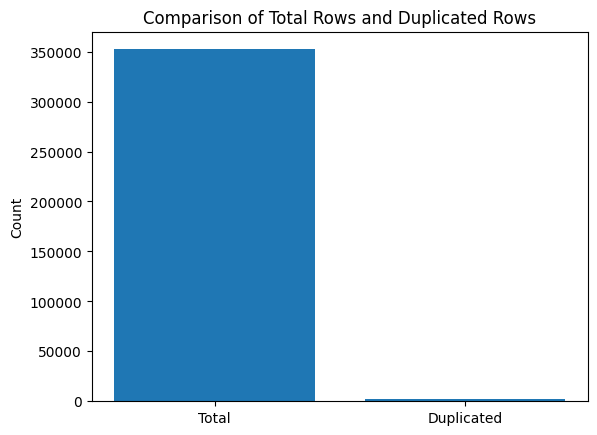

In [35]:
fig, ax = plt.subplots()

ax.bar(['Total', 'Duplicated'], [total_rows, duplicated_rows])
ax.set_ylabel('Count')
ax.set_title('Comparison of Total Rows and Duplicated Rows')
plt.show()

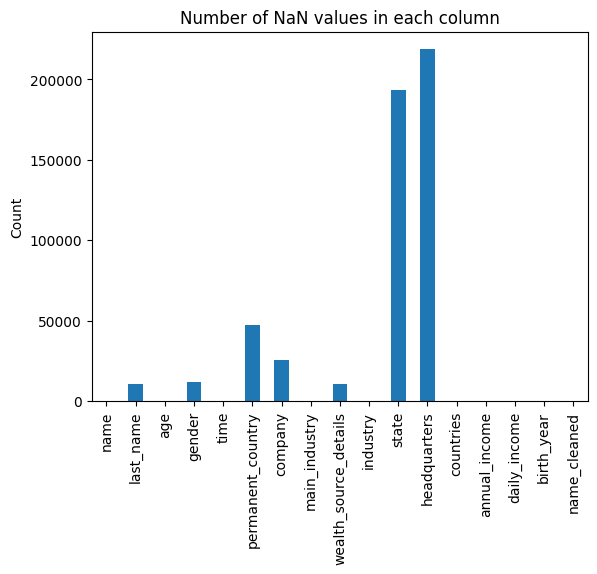

In [36]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Create the bar plot
fig, ax = plt.subplots()
nan_counts.plot(kind='bar')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of NaN values in each column')

plt.show()

In [ ]:
df['gender'] = df['gender'].fillna('undefined')
df['permanent_country'] = df['permanent_country'].fillna('undefined')
df['company'] = df['company'].fillna('undefined')
df['wealth_source_details'] = df['wealth_source_details'].fillna('undefined')


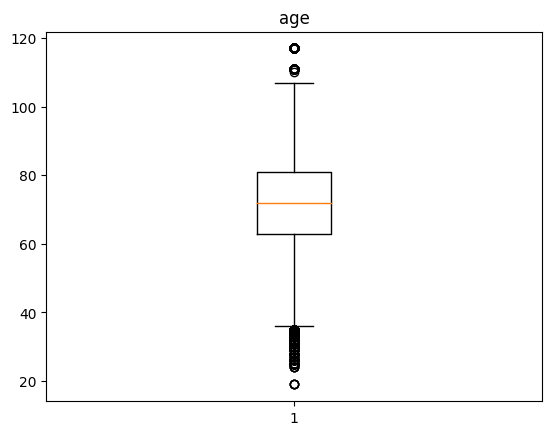

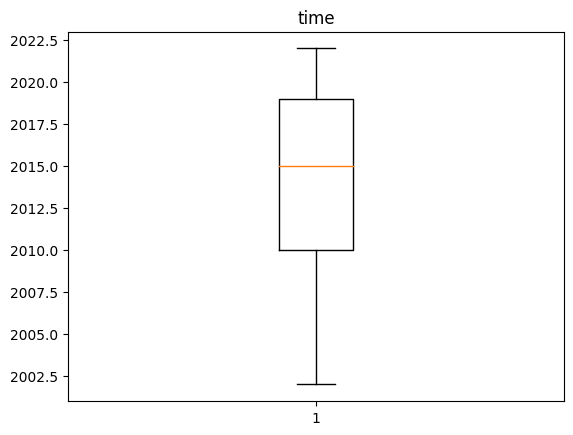

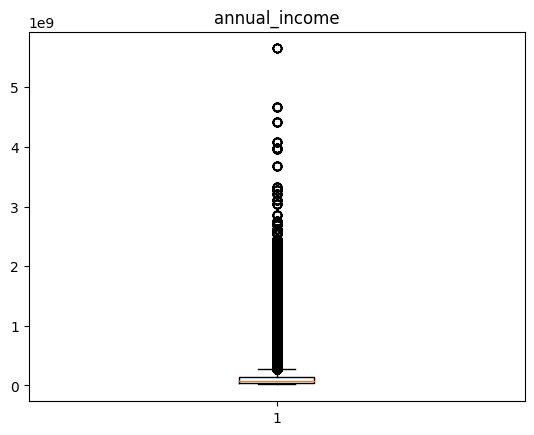

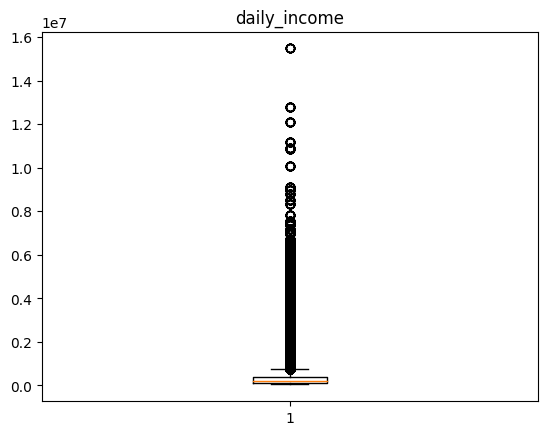

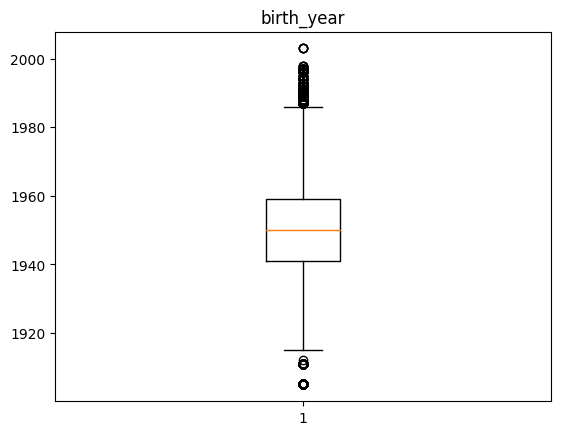

In [39]:
# get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# create box plots for each numeric column
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [43]:
df.sort_values(by='annual_income')

,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
4779,Vinod Gupta,Gupta,76,NaN,2016,India-Delhi-New Delhi,Havells India,Manufacturing,electrical equipment,Manufacturing;Consumer Durables,NaN,NaN,ind,16813500,144657,1946,vinod_gupta
4775,Vinod Gupta,Gupta,76,NaN,2016,India-Delhi-New Delhi,Havells India,Manufacturing,electrical equipment,Manufacturing;Consumer Durables,NaN,NaN,ind,16813500,46064,1946,vinod_gupta
4776,Vinod Gupta,Gupta,76,NaN,2016,India-Delhi-New Delhi,Havells India,Manufacturing,electrical equipment,Manufacturing;Consumer Durables,NaN,NaN,ind,16813500,86342,1946,vinod_gupta
4780,Vinod Gupta,Gupta,76,NaN,2016,India-Delhi-New Delhi,Havells India,Manufacturing,electrical equipment,Manufacturing;Consumer Durables,NaN,NaN,ind,16813500,134301,1946,vinod_gupta
4778,Vinod Gupta,Gupta,76,NaN,2016,India-Delhi-New Delhi,Havells India,Manufacturing,electrical equipment,Manufacturing;Consumer Durables,NaN,NaN,ind,16813500,79138,1946,vinod_gupta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89952,Elon Musk,Musk,50,M,2022,United States-California-Los Angeles,Tesla;Tesla Motors,Automotive,"Tesla, SpaceX; Tesla Motors",Automotive;E-Cars;Automobiles & Components;Aut...,Texas; California,TX; CA,usa,5650200000,1713739,1972,elon_musk
89953,Elon Musk,Musk,50,M,2022,United States-California-Los Angeles,Tesla;Tesla Motors,Automotive,"Tesla, SpaceX; Tesla Motors",Automotive;E-Cars;Automobiles & Components;Aut...,Texas; California,TX; CA,usa,5650200000,1854098,1972,elon_musk
89955,Elon Musk,Musk,50,M,2022,United States-California-Los Angeles,Tesla;Tesla Motors,Automotive,"Tesla, SpaceX; Tesla Motors",Automotive;E-Cars;Automobiles & Components;Aut...,Texas; California,TX; CA,usa,5650200000,15480000,1972,elon_musk
89950,Elon Musk,Musk,50,M,2022,United States-California-Los Angeles,Tesla;Tesla Motors,Automotive,"Tesla, SpaceX; Tesla Motors",Automotive;E-Cars;Automobiles & Components;Aut...,Texas; California,TX; CA,usa,5650200000,1142465,1972,elon_musk


In [ ]:
df[df['age']>110]

In [37]:
df.describe()

,age,time,annual_income,daily_income,birth_year
count,352369.000000,352369.000000,3.523690e+05,3.523690e+05,352369.000000
mean,72.130326,2014.227824,1.437315e+08,3.937844e+05,1949.869674
std,13.237945,5.474610,2.336920e+08,6.402521e+05,13.237945
min,19.000000,2002.000000,1.681350e+07,4.606400e+04,1905.000000
25%,63.000000,2010.000000,4.870500e+07,1.334380e+05,1941.000000
50%,72.000000,2015.000000,7.642500e+07,2.093830e+05,1950.000000
75%,81.000000,2019.000000,1.396560e+08,3.826190e+05,1959.000000
max,117.000000,2022.000000,5.650200e+09,1.548000e+07,2003.000000


In [18]:
df.drop('Unnamed: 0', axis=1)

0

In [10]:
df[df.duplicated(subset=['name', 'last_name', 'age', 'gender', 'time',
       'permanent_country', 'company', 'main_industry',
       'wealth_source_details', 'industry', 'state', 'headquarters',
       'countries', 'annual_income', 'daily_income', 'birth_year',
       'name_cleaned'])]

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
2760,213643,Martin & Olivier Bouygues,Bouygues,69,M,2002,France-Paris,Bouygues,Construction & Engineering,"construction, media",Construction & Engineering; Construction Engi...,NaN,NaN,fra,68187000,301512,1953,martin_olivier_bouygues
2781,213664,Martin & Olivier Bouygues,Bouygues,69,M,2003,France-Paris,Bouygues,Construction & Engineering,"construction, media",Construction & Engineering; Construction Engi...,NaN,NaN,fra,49881000,301512,1953,martin_olivier_bouygues
2802,213685,Martin & Olivier Bouygues,Bouygues,69,M,2004,France-Paris,Bouygues,Construction & Engineering,"construction, media",Construction & Engineering; Construction Engi...,NaN,NaN,fra,72120000,301512,1953,martin_olivier_bouygues
2823,213706,Martin & Olivier Bouygues,Bouygues,69,M,2005,France-Paris,Bouygues,Construction & Engineering,"construction, media",Construction & Engineering; Construction Engi...,NaN,NaN,fra,83664000,301512,1953,martin_olivier_bouygues
2844,213727,Martin & Olivier Bouygues,Bouygues,69,M,2006,France-Paris,Bouygues,Construction & Engineering,"construction, media",Construction & Engineering; Construction Engi...,NaN,NaN,fra,109631999,301512,1953,martin_olivier_bouygues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351095,356997,Zhou Zerong,NaN,68,NaN,2020,China-Guangdong-Shenzhen,Kingold,Estate Holding,NaN,"Estate Holding;Real Estate, Investments;Real e...",NaN,NaN,chn,88032000,245917,1954,zhou_zerong
351101,357003,Zhou Zerong,NaN,68,NaN,2021,China-Guangdong-Shenzhen,Kingold,Estate Holding,NaN,"Estate Holding;Real Estate, Investments;Real e...",NaN,NaN,chn,89760000,245917,1954,zhou_zerong
351107,357009,Zhou Zerong,NaN,68,NaN,2022,China-Guangdong-Shenzhen,Kingold,Estate Holding,NaN,"Estate Holding;Real Estate, Investments;Real e...",NaN,NaN,chn,95460000,245917,1954,zhou_zerong
351220,357122,Zhu Chongyun,Zhu,57,F,2015,NaN,NaN,Fashion & Retail,fashion retail,Fashion & Retail,NaN,NaN,chn,39741000,108879,1965,zhu_chongyun


In [7]:
df.duplicated(subset=['name', 'last_name', 'age', 'gender', 'time',
       'permanent_country', 'company', 'main_industry',
       'wealth_source_details', 'industry', 'state', 'headquarters',
       'countries', 'annual_income', 'daily_income', 'birth_year',
       'name_cleaned']).sum()

df.drop_duplicates()

2419

In [8]:
df

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,358313,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,219780,1957,zygmunt_solorz_zak
352365,358314,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,207493,1957,zygmunt_solorz_zak
352366,358315,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,180887,1957,zygmunt_solorz_zak
352367,358316,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,231452,1957,zygmunt_solorz_zak


In [27]:
df.isna().sum()

Unnamed: 0                    0
name                          0
last_name                 10850
age                           0
gender                    11892
time                          0
permanent_country         47691
company                   25500
main_industry                 0
wealth_source_details     10922
industry                     49
state                    193179
headquarters             218714
countries                     0
annual_income                 0
daily_income                  0
birth_year                    0
name_cleaned                  0
dtype: int64

In [3]:
# ideias inicias
# preço por localização
# Preço por console
# Preço por fabricante

In [9]:
df.isna().sum()

Origen               0
Tienda               0
Fabricante         273
Consola           2489
Género            2526
Título              21
Precio               0
Moneda               0
Disponibilidad       0
dtype: int64

In [13]:
df['Fabricante'].unique()

array(['Capcom', 'Sony', 'Ubisoft', nan, 'Take Two Interactive ',
       'Take-Two Interactive', 'FromSoftware', 'Meriden',
       'Electronic Arts', 'Activision', 'Playstation',
       'Take Two Interactive España SL', 'Meridien', 'TakeTwo',
       'Square Enix', 'Koch Media', 'Warner Home Video', 'Housemarque',
       'Insomniac Games', 'Take2', 'Milestone', 'Ember Lab', 'SCEE',
       'Sega', 'Namco Bandai', 'Bandai Namco Entertainment iberica',
       'Koch Media (Software)', 'Epic Games', 'Nacon', 'THQ Nordic',
       'SNK', 'SEGA', 'Tesura games', 'Electronic Arts Inc.',
       'SelectaPlay', 'Bumble3ee', 'milestone', 'Perpetual Games',
       'Torn Banner Studios', 'Microids', '505 games', 'Giants',
       'Bumblebee', 'Flashpoint Germany GmbH', 'Pqube', 'Tesura Games',
       'NAMCO BANDAI', 'Bumble3ee Interactive', 'Meridiem (Soft)',
       'Atari', 'U&I', 'Mindscape', 'Meridiem Games', 'Meridiem',
       'Bandai Namco', 'TT Games', 'Selectaplay',
       'Focus Home Interactiv

In [12]:
df[df['Fabricante'].isna()]

,Origen,Tienda,Fabricante,Consola,Género,Título,Precio,Moneda,Disponibilidad
4,Mediamarkt,Mediamarkt,NaN,PS5,Terror,Yuoni,29.99,EUR,True
12,Mediamarkt,Mediamarkt,NaN,PS5,Arcade,Spider-Man Miles Morales + Destruction Allstars,59.99,EUR,True
14,Mediamarkt,Mediamarkt,NaN,PS5,Acción,GhostWire: Tokyo,69.99,EUR,True
23,Mediamarkt,Mediamarkt,NaN,PS5,Carreras,F1 2021,45.99,EUR,True
24,Mediamarkt,Mediamarkt,NaN,PS5,Juego de rol,Ghost of Tsushima,70.99,EUR,True
...,...,...,...,...,...,...,...,...,...
1077,Mediamarkt,Mediamarkt,NaN,PS Vita,Simulaciones,My Universe - Interior Designer,39.99,EUR,True
1078,Mediamarkt,Mediamarkt,NaN,PS Vita,Acción,Minecraft Dungeons,37.99,EUR,True
1087,Mediamarkt,Mediamarkt,NaN,PS Vita,Aventura,PJ Masks: Héroes de la Noche,34.99,EUR,True
1089,Mediamarkt,Mediamarkt,NaN,PS Vita,Shooters en primera persona,Rico London,31.99,EUR,True


In [8]:
import psycopg2
import os

def connect_db(database="", user="", password="", host="", port=5432):
    try:
        conn = psycopg2.connect(
            database=database,
            user=user,
            password=password,
            host=host,
            port=port
        )
        return conn
    except psycopg2.Error as e:
        # Handle the exception
        print("Unable to connect to the database:", e)

conn = connect_db(database="gamesdb", user="postgres", password="postgres", host="localhost")

In [7]:
# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("""
            CREATE TABLE games( id INT,
            origin VARCHAR(255),
            retailer VARCHAR(255),
            manufacturer VARCHAR(255),
            console VARCHAR(255),
            genre VARCHAR(255),
            title VARCHAR(255),
            price DECIMAL(10,2),
            currency VARCHAR(10),
            disponibility BOOLEAN """)

# Fetch the query results
rows = cur.fetchall()

# Close the cursor and the database connection
cur.close()
conn.close()

UndefinedTable: relation "your_table_name" does not exist
LINE 1: SELECT * FROM your_table_name
                      ^
